In [30]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None, 'display.max_columns', None)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, models
import matplotlib.pyplot as plt

In [2]:
coarse_label = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

mapping = {
'aquaticmammals':['beaver','dolphin','otter','seal','whale'],
'fish':['aquarium_fish','flatfish','ray','shark','trout'],
'flowers':['orchid','poppy','rose','sunflower','tulip'],
'foodcontainers':['bottle','bowl','can','cup','plate'],
'fruitandvegetables':['apple','mushroom','orange','pear','sweet_pepper'],
'householdelectricaldevice':['clock','computer_keyboard','lamp','telephone','television'],
'householdfurniture':['bed','chair','couch','table','wardrobe'],
'insects':['bee','beetle','butterfly','caterpillar','cockroach'],
'largecarnivores':['bear','leopard','lion','tiger','wolf'],
'largeman-madeoutdoorthings':['bridge','castle','house','road','skyscraper'],
'largenaturaloutdoorscenes':['cloud','forest','mountain','plain','sea'],
'largeomnivoresandherbivores':['camel','cattle','chimpanzee','elephant','kangaroo'],
'medium-sizedmammals':['fox','porcupine','possum','raccoon','skunk'],
'non-insectinvertebrates':['crab','lobster','snail','spider','worm'],
'people':['baby','boy','girl','man','woman'],
'reptiles':['crocodile','dinosaur','lizard','snake','turtle'],
'smallmammals':['hamster','mouse','rabbit','shrew','squirrel'],
'trees':['maple_tree','oak_tree','palm_tree','pine_tree','willow_tree'],
'vehicles1':['bicycle','bus','motorcycle','pickup_truck','train'],
'vehicles2':['lawn_mower','rocket','streetcar','tank','tractor'],
}

In [7]:
(x_train, y_train_cp), (x_test, y_test_cp) = keras.datasets.cifar100.load_data()
print(x_train.shape)
print(x_train[0, :, :, 1].min(), x_train[0, :, :, 1].max())
print(x_train[0].shape, y_train_cp[0].shape, y_train_cp[0])
# pd.DataFrame(x_train[0, :, :, 1])

(50000, 32, 32, 3)
7 255
(32, 32, 3) (1,) [19]


In [53]:
X_train = x_train / 255 # rescale the 8bit values from 0-255 to the unit interval
X_test = x_test / 255
y_train = pd.get_dummies([i[0] for i in y_train_cp])
y_test = pd.get_dummies([i[0] for i in y_test_cp])
print(y_train.shape)
# pd.DataFrame(X_train[0, :, :, 1])


(50000, 100)


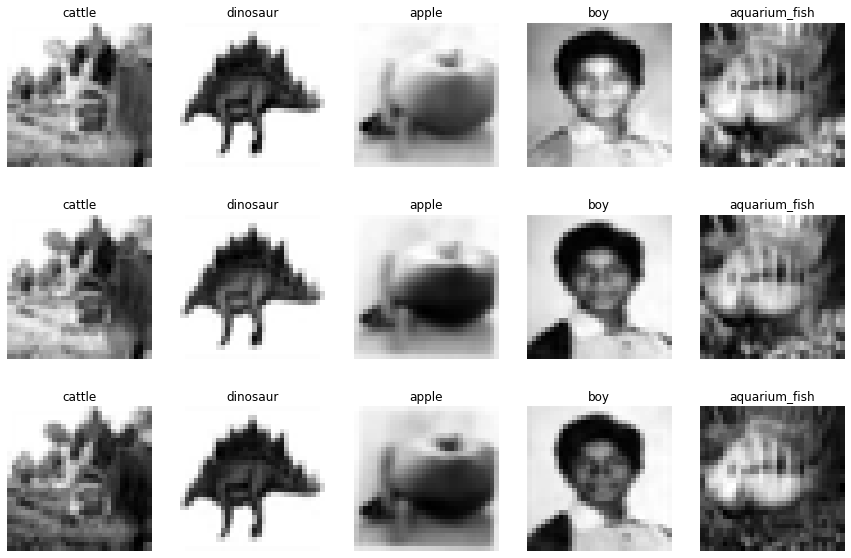

In [6]:
nrow, ncol = 3, 5
fig, axes = plt.subplots(nrows=nrow, ncols=ncol, figsize=(15,10))
for i in range(5):
    for j in range(3):
        axes[j, i].imshow(x_train[i, :, :, j], cmap='gray') # X_train replacable with x_train
        axes[j, i].set_title(coarse_label[y_train_cp[i][0]])
        axes[j, i].set_axis_off()


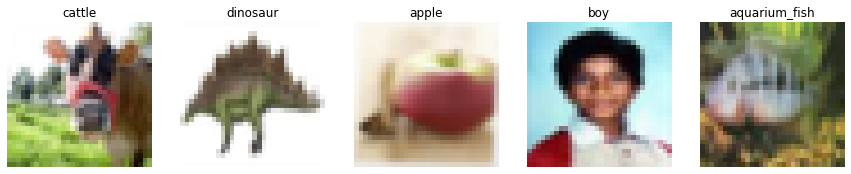

In [10]:
nrow, ncol = 3, 5
fig, axes = plt.subplots(nrows=1, ncols=ncol, figsize=(15,10))
for i in range(5):
        axes[i].imshow(x_train[i, :, :, :]) # X_train replacable with x_train
        axes[i].set_title(coarse_label[y_train_cp[i][0]])
        axes[i].set_axis_off()

In [43]:
model = models.Sequential()
# Each convolution filter produces a new channel at 1st hidden layer, each of which is a 32x32 feature map
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu', input_shape=X_train[0].shape)) # 32 channels
model.add(layers.MaxPool2D(pool_size=(2,2) ))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu' ))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu' ))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu' )) # 256 channels
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(rate=.5))
model.add(layers.Dense(units=512, activation='relu'))
# The softmax function, also known as softargmax or normalized exponential function,  is a generalization of the logistic function to multiple dimensions. 
# It is used in multinomial logistic regression and is often used as the last activation function of a neural network to normalize the output of a network to 
# a probability distribution over predicted output classes
model.add(layers.Dense(units=100, activation='softmax'))

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 4, 4, 256)       

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.RMSprop(), metrics=keras.metrics.Accuracy())

In [44]:
# the stochastic gradient descent algorithms for ftting deep learning models repeatedly process randomly selected batches of 128 training images at a time
history = model.fit(x=X_train, y=y_train, epochs=30, batch_size=128, validation_split=.2)

2022-04-23 12:59:55.528756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:179] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30
313/313 [==============================] - 29s 92ms/step - loss: 4.2031 - accuracy: 0.0000e+00 - val_loss: 3.7743 - val_accuracy: 0.0000e+00
Epoch 2/30
313/313 [==============================] - 26s 84ms/step - loss: 3.5864 - accuracy: 0.0000e+00 - val_loss: 3.5580 - val_accuracy: 0.0000e+00
Epoch 3/30
313/313 [==============================] - 27s 86ms/step - loss: 3.2211 - accuracy: 0.0000e+00 - val_loss: 3.4083 - val_accuracy: 0.0000e+00
Epoch 4/30
313/313 [==============================] - 27s 87ms/step - loss: 2.9774 - accuracy: 0.0000e+00 - val_loss: 3.1064 - val_accuracy: 0.0000e+00
Epoch 5/30
313/313 [==============================] - 27s 86ms/step - loss: 2.7819 - accuracy: 0.0000e+00 - val_loss: 2.6988 - val_accuracy: 0.0000e+00
Epoch 6/30
313/313 [==============================] - 27s 86ms/step - loss: 2.6070 - accuracy: 0.0000e+00 - val_loss: 2.6590 - val_accuracy: 0.0000e+00
Epoch 7/30
313/313 [==============================] - 27s 87ms/step - loss: 2.4590 - acc

In [45]:
y_pred = model.predict(x=X_test)

In [61]:
from sklearn.metrics import precision_score
precision_score(y_pred=y_pred.round(), y_true=y_test, average='weighted') 

0.5846431692755671

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

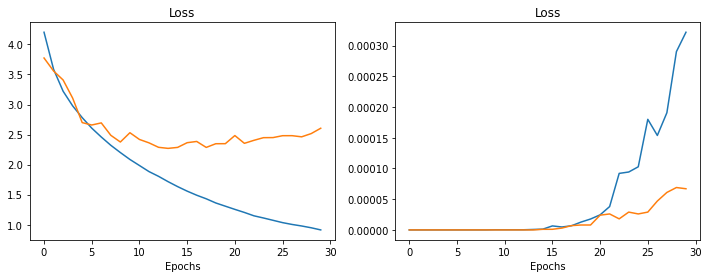

In [80]:
fig, axes = plt.subplots(1,2, figsize=(12,4), sharex=True)
axes[0].plot(history.epoch, history.history['loss'])
axes[0].plot(history.epoch, history.history['val_loss'])
axes[0].set_title('Loss')
axes[0].set_xlabel('Epochs')
axes[1].plot(history.epoch, history.history['accuracy'])
axes[1].plot(history.epoch, history.history['val_accuracy'])
axes[1].set_title('Loss')
axes[1].set_xlabel('Epochs');

In [79]:
# model.save('model_cnn_cifar100.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model identical to the previous one
# model = models.load_model('model_cnn_cifar100.h5')